# Question 8

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### I. Numpy

#### 1. Indexing

In [92]:
arr = np.arange(20)
print("Array: ",arr)
print("Element at index 2: ",arr[2])
print("Element at index 5: ",arr[5])
print("Elements from index 2 to 5: ",arr[2:6])

Array:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Element at index 2:  2
Element at index 5:  5
Elements from index 2 to 5:  [2 3 4 5]


#### 2. Boolean Indexing

In [93]:
arr = np.arange(20)
print("Array: ",arr)
print("Elements greater than 5: ",arr[arr > 5])
print("Elements greater than 10: ",arr[arr > 10])

Array:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Elements greater than 5:  [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Elements greater than 10:  [11 12 13 14 15 16 17 18 19]


#### 3. Fancy Indexing

In [102]:
arr = np.arange(20)
print("Array: ",arr)
print("Elements at indices 2,4,6,8,10,12: ",arr[[2,4,6,8,10,12]])
print("Element at indices 3,5,1,7,13,17,12: ",arr[[3,5,1,7,13,17,12]])

Array:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Elements at indices 2,4,6,8,10,12:  [ 2  4  6  8 10 12]
Element at indices 3,5,1,7,13,17,12:  [ 3  5  1  7 13 17 12]


### II. Pandas

#### 1. Add, subtract, multiply and divide two Pandas Series.

In [105]:
ser1 = pd.Series([2, 4, 6, 8, 10])
ser2 = pd.Series([1, 3, 5, 7, 9])

print(f"Addition:\n{ser1 + ser2}")
print(f"Subtraction:\n{ser1 - ser2}")
print(f"Multiplication:\n{ser1 * ser2}")
print(f"Division:\n{ser1 / ser2}")

Addition:
0     3
1     7
2    11
3    15
4    19
dtype: int64
Subtraction:
0    1
1    1
2    1
3    1
4    1
dtype: int64
Multiplication:
0     2
1    12
2    30
3    56
4    90
dtype: int64
Division:
0    2.000000
1    1.333333
2    1.200000
3    1.142857
4    1.111111
dtype: float64


#### 2. Convert dictionary into Pandas Series.

In [107]:
data = {'name': ['Alice', 'Bob', 'Charlie'],
        'age': [25, 30, 22],
        'city': ['London', 'Paris', 'New York']}

series = pd.Series(data)
print(series)

name        [Alice, Bob, Charlie]
age                  [25, 30, 22]
city    [London, Paris, New York]
dtype: object


#### 3. Sort a given Pandas Series

In [116]:
series = pd.Series([2,4,1,3,8,0,5,6,9,7])
print(f"Series:\n{series}")

sorted_series = series.sort_values()
print(f"Sorted series:\n{sorted_series}")

Series:
0    2
1    4
2    1
3    3
4    8
5    0
6    5
7    6
8    9
9    7
dtype: int64
Sorted series:
5    0
2    1
0    2
3    3
1    4
6    5
7    6
9    7
4    8
8    9
dtype: int64


### III. Movies Dataset

In [15]:
data = pd.read_csv("Movies_Dataset.csv")

#### 1. Find number of movies released under each genre in each year.

In [18]:
data['Release Date'] = pd.to_datetime(data['Release Date'] ,errors='coerce')
data['Release Year'] = data['Release Date'].dt.year

data.groupby(["Release Year", "Major Genre"]).size().reset_index(name='No.of films')
# data.groupby(['Release Year', 'Major Genre'])['Major Genre'].value_counts().reset_index(name='No.of films')

,Release Year,Major Genre,No.of films
0,1929.0,Musical,1
1,1934.0,Romantic Comedy,1
2,1938.0,Drama,1
3,1939.0,Drama,1
4,1940.0,Drama,1
...,...,...,...
362,2072.0,Drama,1
363,2072.0,Western,1
364,2073.0,Action,1
365,2073.0,Comedy,2


#### 2. Find movies with loss every year for each distributor.

In [30]:
data['Worldwide Gross'] = pd.to_numeric(data['Worldwide Gross'], errors='coerce')
data['Production Budget'] = pd.to_numeric(data['Production Budget'], errors='coerce')

df = data[data["Worldwide Gross"] - data["Production Budget"] < 0]

display(df.groupby(['Release Year', 'Distributor'])[['Release Year', 'Distributor', 'Title']].head())

,Release Year,Distributor,Title
0,1998.0,Gramercy,The Land Girls
1,1998.0,Strand,"First Love, Last Rites"
2,1998.0,Lionsgate,I Married a Strange Person
19,2057.0,United Artists,12 Angry Men
21,2072.0,Sony/Columbia,1776
...,...,...,...
3190,2003.0,Indican Pictures,The Young Unknowns
3191,2009.0,Apparition,The Young Victoria
3193,1998.0,Sony Pictures,Zero Effect
3197,2007.0,Paramount Pictures,Zodiac


#### 3. Find the Directors who directed for each creative type with IMDB rating above 6.

In [47]:
df = data[data['IMDB Rating'] > 6]

df.groupby('Creative Type')[['Director', 'Creative Type', 'IMDB Rating']].head().drop_duplicates()

,Director,Creative Type,IMDB Rating
20,Terry Gilliam,Science Fiction,8.1
21,NaN,Historical Fiction,7.0
24,Stanley Kubrick,Science Fiction,8.4
28,Michael Polish,Contemporary Fiction,7.1
34,Robert Rodriguez,Contemporary Fiction,6.4
35,Alan Alda,Contemporary Fiction,7.0
36,Mike Newell,Contemporary Fiction,7.1
41,James Cameron,Science Fiction,7.6
43,Tom Shadyac,Contemporary Fiction,6.6
49,NaN,Fantasy,7.3


#### 4. Draw the plot to compare the number of movies released till now by each director.

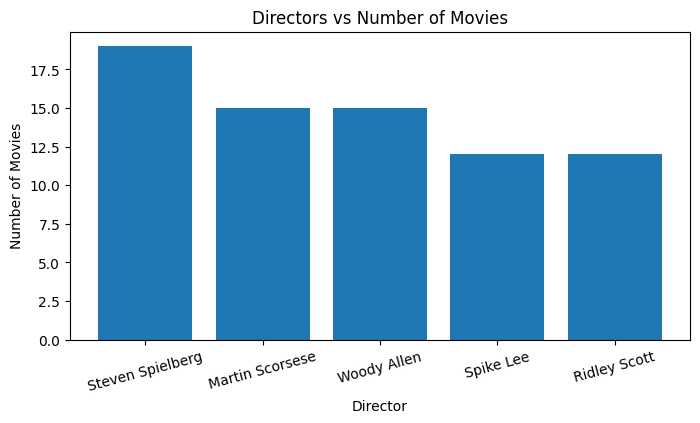

,Director,Title
392,Steven Spielberg,19
253,Martin Scorsese,15
442,Woody Allen,15
379,Spike Lee,12
335,Ridley Scott,12


In [86]:
topDirectors = df.groupby('Director')['Title'].nunique().reset_index().sort_values(by='Title', ascending=False).head(5)

plt.figure(figsize=(8, 4))
plt.xticks(rotation=15, ha='center')

plt.title('Directors vs Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')

plt.bar(topDirectors['Director'], topDirectors['Title'])
plt.show()

display(topDirectors)